### Working Analysis of Opioid Prescription/Mortality Data

As a first step, import the data taken from Griffith, Kevin (2021), “County-level data on U.S. opioid distributions, demographics, healthcare supply, and healthcare access ”, Mendeley Data, V6, doi: 10.17632/dwfgxrh7tn.6 [link](https://data.mendeley.com/datasets/dwfgxrh7tn/6)

In [26]:
import pandas as pd

# import opiod prescription data
opioid_df = pd.read_csv('.\..\Datasets\Analytic File 3-31-21 DIB.csv', encoding='unicode_escape')
opioid_df.head()

,YR,F00002,F12424,F00010,F04437,F00020,F09787,F14642,F13214,F13220,...,PCT_45T64,PCT_65PLUS,EXP_EARLY,ORD_DEATHS_NOIMP,ORD_CDR,ORD_CDR_NOIMP,CANCER_DEATHS_NOIMP,CANCER_CDR,NP_RX,PDMP_REQ_CHECK
0,2006,2013,AK,Aleutians East (B),"ALEUTIANS EAST (B), AK",9.0,1.0,5,0,0,...,45.561012,5.855686,0,NaN,23.978888,NaN,NaN,32.210746,1,0
1,2006,2130,AK,Ketchikan Gateway (B),"KETCHIKAN GATEWAY (B), AK",7.0,2.0,9,1,0,...,31.358338,10.213688,0,NaN,29.214887,NaN,72.0,53.795577,1,0
2,2006,2016,AK,Aleutians West (CA),"ALEUTIANS WEST (CA), AK",7.0,2.0,2,0,0,...,38.518801,3.683909,0,NaN,11.462599,NaN,NaN,32.214865,1,0
3,2006,2185,AK,North Slope (B),"NORTH SLOPE (B), AK",7.0,1.0,2,0,0,...,46.973366,6.083535,0,NaN,40.258017,NaN,30.0,45.399516,1,0
4,2006,2280,AK,Wrangell-Petersburg (CA),"WRANGELL-PETERSBURG (CA), AK",7.0,2.0,24,2,0,...,100.000000,100.000000,0,NaN,410.104987,NaN,39.0,63.976378,1,0


As a proof of concept, we will only consider data from West Virgninia. The analysis can be extended to other states once the workflow is finalised

In [27]:
wv_opioid_df = opioid_df.loc[opioid_df['F12424'] == 'WV']
# this should only show 'WV' as we have filtered this down
wv_opioid_df['F12424'].unique()

array(['WV'], dtype=object)

We are only going to consider data from 2013 for now, a regression will be completed for each year 

In [28]:
# for now we will also filter out the year, we just want to analyse the data from 2013
wv_opioid_df_2013 = wv_opioid_df[wv_opioid_df['YR'] == 2013]
# this should only show '2013' as we have filtered this down
wv_opioid_df_2013['YR'].unique()

array([2013], dtype=int64)

In [29]:
X, Y = wv_opioid_df_2013.shape
wv_opioid_df_2013.describe()

,YR,F00002,F00020,F09787,F14642,F13214,F13220,F11984,F04538,F04542,...,PCT_45T64,PCT_65PLUS,EXP_EARLY,ORD_DEATHS_NOIMP,ORD_CDR,ORD_CDR_NOIMP,CANCER_DEATHS_NOIMP,CANCER_CDR,NP_RX,PDMP_REQ_CHECK
count,55.0,55.00000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.0,34.000000,55.000000,34.000000,55.000000,55.000000,55.0,55.0
mean,2013.0,54055.00000,5.236364,1.454545,17.927273,1.018182,0.363636,33714.618182,2.167273,1.021818,...,30.256184,16.946982,0.0,46.882353,81.222269,102.373930,268.890909,83.403692,0.0,1.0
std,0.0,32.04164,2.309109,0.715391,33.464107,1.096981,0.588898,33503.024309,2.717301,1.025542,...,2.234378,2.325579,0.0,45.311558,53.713592,58.412592,257.087798,11.447498,0.0,0.0
min,2013.0,54001.00000,1.000000,0.000000,0.000000,0.000000,0.000000,5901.000000,0.100000,0.400000,...,20.295481,9.607525,0.0,10.000000,26.376873,26.376873,55.000000,42.532804,0.0,1.0
25%,2013.0,54028.00000,3.000000,1.000000,3.000000,0.000000,0.000000,13523.000000,0.450000,0.500000,...,29.434864,15.925728,0.0,16.500000,43.226737,58.706243,106.000000,76.793461,0.0,1.0
50%,2013.0,54055.00000,6.000000,2.000000,6.000000,1.000000,0.000000,23737.000000,1.000000,0.700000,...,30.401246,17.110024,0.0,31.500000,63.002700,91.800761,197.000000,83.863739,0.0,1.0
75%,2013.0,54082.00000,7.000000,2.000000,13.000000,1.000000,1.000000,38712.000000,2.800000,1.000000,...,31.931315,18.200285,0.0,51.500000,103.186721,118.095012,327.000000,89.978378,0.0,1.0
max,2013.0,54109.00000,9.000000,2.000000,170.000000,4.000000,2.000000,191275.000000,12.300000,5.700000,...,34.063906,22.500335,0.0,213.000000,243.277293,243.277293,1580.000000,102.414527,0.0,1.0


In [30]:
print(f"The dataset has {X} rows and {Y} columns")

The dataset has 55 rows and 156 columns


The data set provided has more rows than columns, so a big part of this analysis will be removing features to a more manageable, impactful number. The first thing we can do is drop unneccessary columns, such as any which describe the county:
- YR : Calender Year
- F00002: FIPS Code
- F12424: State Name Abreviation
- F00010: County Name
- F04437: County name w/ state abbreviation

I'm also going to drop 'PILL_QUART' for now, this feature requires further analysis

In [31]:
filtered_cols = [x for x in list(wv_opioid_df_2013.columns) if x not in ['YR', 'F00002', 'F12424', 'F00010' ,'F04437', 'PILL_QUART']]
print(f"there are {len(filtered_cols)} features left in the dataset")
filtered_wv_opioid_df_2013 = wv_opioid_df_2013[filtered_cols]

there are 150 features left in the dataset


In [32]:
# lets also check for na's
filtered_wv_opioid_df_2013[filtered_wv_opioid_df_2013.columns[filtered_wv_opioid_df_2013.isna().any()]]

,CDR_NOIMP,ORD_DEATHS_NOIMP,ORD_CDR_NOIMP
26653,NaN,NaN,NaN
26654,105.265466,48.0,105.265466
26655,NaN,NaN,NaN
26656,60.067692,52.0,60.067692
26657,NaN,NaN,NaN
26658,92.162501,25.0,92.162501
26659,NaN,NaN,NaN
26660,NaN,NaN,NaN
26661,NaN,NaN,NaN
26662,76.775432,18.0,76.775432


There are NA's for about 20 counties for the features non-imputed Cancer Deaths (CDR_NOIMP), non-imputed Opioid Deaths (ORD_DEATHS_NOIMP) and non-imputed Crude Opioid Death Rate (ORD_CDR_NOIMP) as they are suppressed for counties having less than 10 deaths. For now, lets use the death rates with imputation and remove these columns from the dataset

In [33]:
filtered_wv_opioid_df_2013 = filtered_wv_opioid_df_2013.drop(['ORD_DEATHS_NOIMP', 'ORD_CDR_NOIMP', 'CDR_NOIMP'], axis=1)
# the following dataframe should be empty without the columns containing na's
filtered_wv_opioid_df_2013[filtered_wv_opioid_df_2013.isna().any(axis=1)]
# wv_opioid_df_2013[wv_opioid_df_2013.isna().any(axis=1)]

,F00020,F09787,F14642,F13214,F13220,F11984,F04538,F04542,F11396,F13191,...,SPEC_PC,PCT_25T44,PCT_45T64,PCT_65PLUS,EXP_EARLY,ORD_CDR,CANCER_DEATHS_NOIMP,CANCER_CDR,NP_RX,PDMP_REQ_CHECK


Before we can look at removing variables, we need to standardize the dataset so that the ranges are similar. This can be done using ScikitLearns StandardScaler.

In [53]:
# get the list of column names out now
col_names = list(filtered_wv_opioid_df_2013.columns)

# as the ranges in the features are quite different, we need to scale the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(filtered_wv_opioid_df_2013)
scaled_results = model.transform(filtered_wv_opioid_df_2013)
# conver to df so that we can keep the feature names together
scaled_filtered_wv_opioid_df_2013 = pd.DataFrame(scaled_results, columns=col_names)

To reduce the number of variables, we can use [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV) which will fit a linear model which gives the best fit to the data with the least amount of features. It will determine the tuning parameter, $\alpha$, using 5-fold cross validation

The objective of the model will be to predict Per Capita Opioid Pill Volume (PCPV)

In [35]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LassoCV
from sklearn.model_selection import train_test_split

independent_cols = [x for x in list(scaled_filtered_wv_opioid_df_2013.columns) if x != 'PCPV']

X = scaled_filtered_wv_opioid_df_2013[independent_cols]
Y = scaled_filtered_wv_opioid_df_2013['PCPV']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.25, 
                                                    random_state=42)

lasso_model = LassoCV(max_iter = 5000).fit(X_train, y_train)

In [36]:
important_features = pd.DataFrame({'Feature': lasso_model.feature_names_in_, 'Coef': list(lasso_model.coef_) })
important_features_df = important_features[important_features['Coef'] != 0.0].sort_values(by='Coef', ascending=False).reset_index(drop=True)
important_features_df

,Feature,Coef
0,DOSAGE_UNIT,0.579750
1,ORD_CDR,0.462571
2,F13214,0.143770
3,NONMETRO,0.128336
4,SPEC_65T74_PC,0.106408
5,PCT_55T64,0.097782
6,ARF_CDR,0.057176
7,F06795,0.046067
8,PCT_45T64,0.006538
9,F13874,0.005512


In [37]:
from sklearn.metrics import mean_squared_error,r2_score

y_pred_train = lasso_model.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print(f"mean squared error from model is {mse} on training set")
print(f"r-squared from model is {r2} on training set")

y_pred_test = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f"mean squared error from model is {mse} on test set")
print(f"r-squared from model is {r2} on test set")

mean squared error from model is 0.10578158215844137 on training set
r-squared from model is 0.8961006326960601 on training set
mean squared error from model is 0.09017214460425584 on test set
r-squared from model is 0.8999207537753161 on test set


Text(0.5, 0, 'Measured Values')

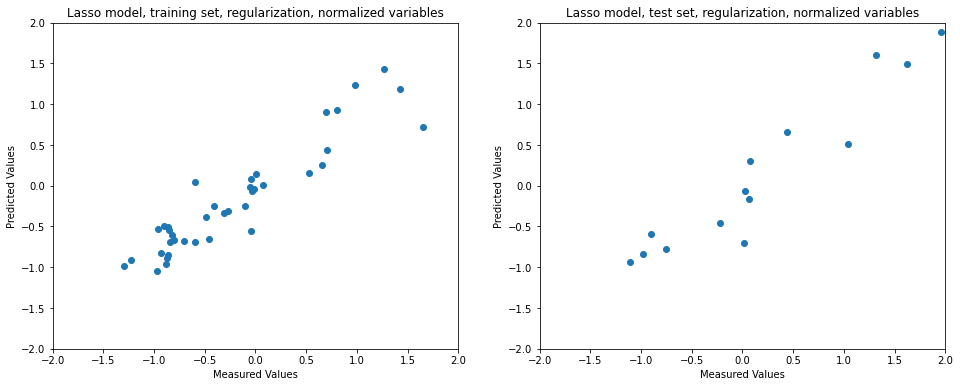

In [38]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize = (16, 6))
grid = plt.GridSpec(1, 2, wspace=0.2, hspace=0.3)

plt.subplot(grid[0, 0])
plt.scatter(y_train, y_pred_train)
plt.xlim([-2.0, 2.0])
plt.ylim([-2.0, 2.0])
plt.title("Lasso model, training set, regularization, normalized variables")
plt.ylabel("Predicted Values")
plt.xlabel("Measured Values")

plt.subplot(grid[0, 1])
plt.scatter(y_test, y_pred_test)
plt.xlim([-2.0, 2.0])
plt.ylim([-2.0, 2.0])
plt.title("Lasso model, test set, regularization, normalized variables")
plt.ylabel("Predicted Values")
plt.xlabel("Measured Values")


In [41]:
features_code_map = {'DOSAGE_UNIT': 'Total number of opioid pills distributed',
                     'ORD_CDR': 'Crude Opioid-Related Death Rate',
                     'F13214': 'Number of home health agencies',
                     'NONMETRO': 'Non-metropolitan indicator',
                     'SPEC_65T74_PC': 'Medical specialists aged 65 to 74',
                     'PCT_55T64': 'percent aged 55-64',
                     'ARF_CDR': 'Crude annual death rate',
                     'F06795': 'Unemployment Rate',
                     'PCT_45T64': 'percent aged 45-64',
                     'F13874': 'Total Area',
                     'F04918': 'Number of medical specialists aged 45-54',
                     'F14587': 'percent employed in manufacturing',
                     'OP_PC': 'Outpatient visits per capita',
                     'PCT_65T74': 'percent aged 65-74',
                     'F15474': 'Uninsurance rate for those under age 65 years',
                     'SPEC_45T54_PC': 'Medical specialists aged 45 to 54',
                     'F13911': 'Total black female population'
                     } 

important_features_df['Description'] = important_features_df.apply(
    lambda x: features_code_map[x.Feature], axis=1
)
important_features_df

,Feature,Coef,Description
0,DOSAGE_UNIT,0.579750,Total number of opioid pills distributed
1,ORD_CDR,0.462571,Crude Opioid-Related Death Rate
2,F13214,0.143770,Number of home health agencies
3,NONMETRO,0.128336,Non-metropolitan indicator
4,SPEC_65T74_PC,0.106408,Medical specialists aged 65 to 74
5,PCT_55T64,0.097782,percent aged 55-64
6,ARF_CDR,0.057176,Crude annual death rate
7,F06795,0.046067,Unemployment Rate
8,PCT_45T64,0.006538,percent aged 45-64
9,F13874,0.005512,Total Area
